In [16]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier


In [4]:
credit_card_data = pd.read_csv('/content/creditcard_2023.csv')

In [6]:
credit_card_data.head()

id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10    0.0  
1  0.296503 -0.248052 -0.064512   6531.37    0.0  
2 -0.312895 -0.300258 -0.244718   2513.54    0.0  
3 -0.515950 -0.165316  0.048424   5384.44    0.0  
4  1.071126  0.023712  0.419117  14278.97    0.0  

[5 rows x 31 columns]

In [8]:
credit_card_data.tail()

id        V1        V2        V3        V4        V5        V6  \
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
568625 -0.900861  0.560661 -0.006018  3.308968  0.081564   4394.16      1  
568626 -0.846452 -0.153443  1.961398 -1.528642  1.704306   4653.40      1  
568627 -0.448909  0.540073 -0.755836 -0.487540 -0.268741  23572.85      1  
568628 -0.554643 -0.099669 -1.434931 -0.159269 -0.076251  10160.83      1  
568629  0.931030 -0.349423 -1.090974 -1.575113  0.722936  21493.92      1  

[5 rows x 31 columns]

In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [10]:
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_card_data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [12]:
credit_card_data = credit_card_data.dropna(how='any')

In [13]:
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_card_data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

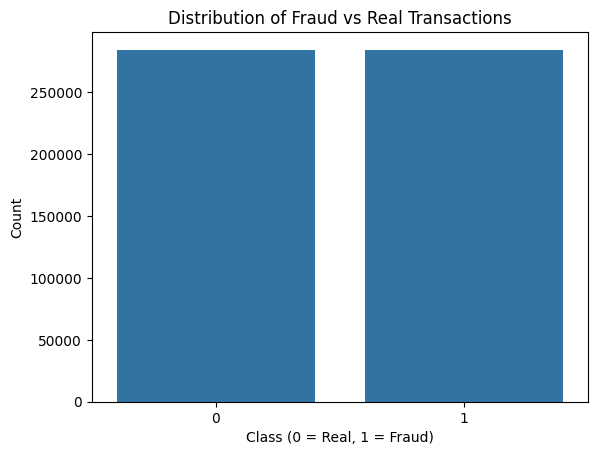

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data= credit_card_data)
plt.title('Distribution of Fraud vs Real Transactions')
plt.xlabel('Class (0 = Real, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

<ipython-input-26-2c6eec1d8962>:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


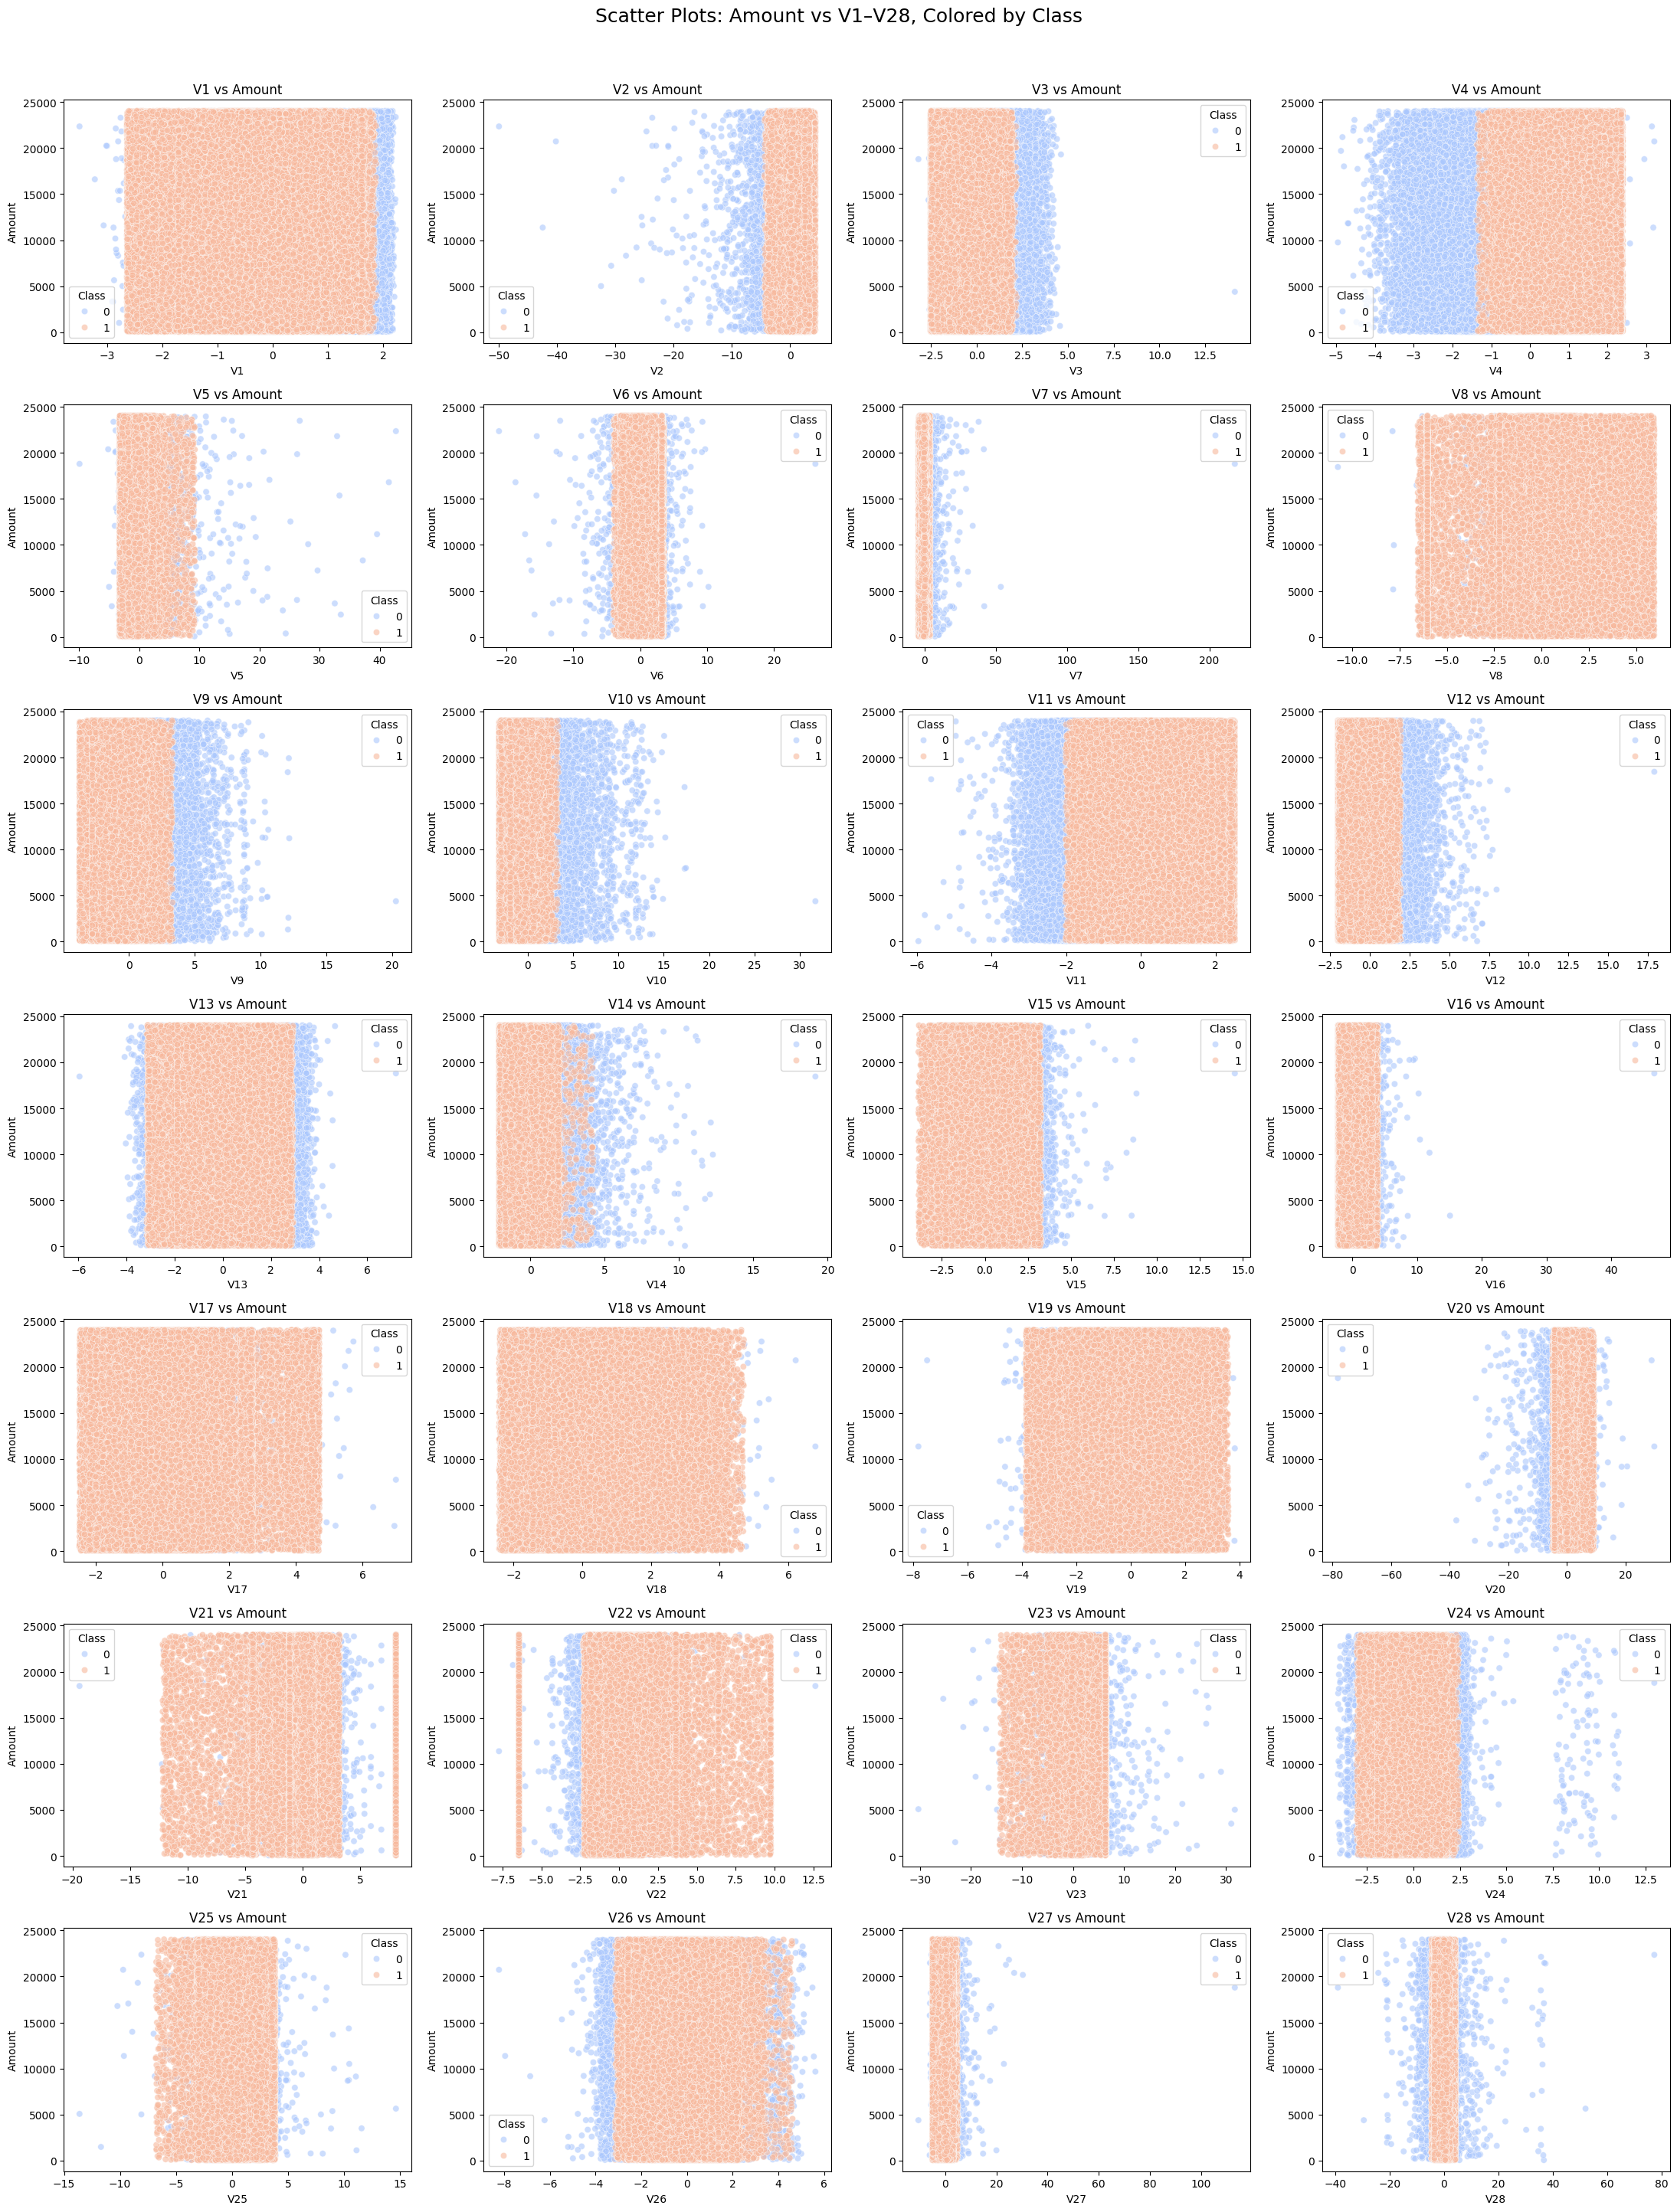

In [26]:
features = [f'V{i}' for i in range(1, 29)]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(22, 28))
axes = axes.flatten()

# Loop through each feature and plot
for idx, feature in enumerate(features):
    sns.scatterplot(
        x=credit_card_data[feature],
        y=credit_card_data['Amount'],
        hue=credit_card_data['Class'],
        palette='coolwarm',
        alpha=0.6,
        ax=axes[idx]
    )
    axes[idx].set_title(f'{feature} vs Amount')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Amount')

# Remove unused axes
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Scatter Plots: Amount vs V1–V28, Colored by Class', fontsize=18, y=1.03)
plt.show()

In [16]:
Real = credit_card_data[credit_card_data.Class == 0]
Fraud = credit_card_data[credit_card_data.Class == 1]

In [17]:
print(Real.shape)
print(Fraud.shape)

(284315, 31)
(284315, 31)


In [18]:
Real.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [19]:
Fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
credit_card_data.groupby('Class').mean()

id        V1        V2        V3        V4        V5  \
Class                                                                    
0      142442.987714  0.505761 -0.491878  0.682095 -0.735981  0.338639   
1      426186.012286 -0.505761  0.491878 -0.682095  0.735981 -0.338639   

             V6        V7        V8        V9  ...       V20      V21  \
Class                                          ...                      
0      0.435088  0.491234 -0.144294  0.585522  ... -0.179851 -0.10964   
1     -0.435088 -0.491234  0.144294 -0.585522  ...  0.179851  0.10964   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.014098 -0.010255  0.130107 -0.061847 -0.071052 -0.214002 -0.102024   
1      0.014098  0.010255 -0.130107  0.061847  0.071052  0.214002  0.102024   

             Amount  
Class                
0      12026.313506  
1      12057.601763  

[2 rows x 30 columns]

Data Split


In [6]:
df_sample, _ = train_test_split(credit_card_data, train_size=0.5, stratify=credit_card_data['Class'], random_state=42)

In [7]:
X = df_sample.drop (columns ='Class', axis = 1)
Y = df_sample['Class']

In [8]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
276515  276515 -0.052802 -0.203172  0.542635 -1.042929  0.968922  0.058840   
350974  350974 -0.274540  0.066590  0.067607  0.022056  0.123597 -0.360887   
567752  567752 -0.388809  0.507026 -0.519729  1.074936 -0.583329 -0.338844   
549346  549346 -2.169169  2.524054 -2.122467  1.201514 -2.559668 -2.474099   
476660  476660 -1.036645 -1.760301 -0.401020  0.806500  2.039347 -1.758166   
...        ...       ...       ...       ...       ...       ...       ...   
29518    29518  0.849589 -0.585433  0.729549 -0.327941  0.226241  1.219256   
17816    17816 -0.013893 -0.135870  1.330575 -0.685742  0.407958  0.236184   
479919  479919  0.667985  0.225092 -0.672242  0.639674  0.182082 -0.359786   
221365  221365  1.636137 -0.625493  0.076147 -0.491590  0.123819 -0.112986   
118080  118080  1.043410 -0.468321  0.605835 -0.677181  0.073969  0.022986   

              V7        V8        V9  ...       V20       V21  

In [9]:
print (Y)

276515    0
350974    1
567752    1
549346    1
476660    1
         ..
29518     0
17816     0
479919    1
221365    0
118080    0
Name: Class, Length: 56863, dtype: int64


Split Data into train and test set

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify =Y, random_state = 2 )

In [11]:
print (X.shape,X_train.shape, X_test.shape)

(56863, 30) (45490, 30) (11373, 30)


Model Training

In [12]:
ranf = RandomForestClassifier(n_estimators=100, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [14]:
ensemble = VotingClassifier(estimators=[
    ('rf', ranf),
    ('gb', gbc)
], voting='hard')

In [15]:
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))])

Model Evaulation

Accuracy Score

In [17]:
x_train_prediction = ensemble.predict(X_train)
training_data_accuarcy = accuracy_score(x_train_prediction, Y_train)

In [18]:
print('Accuarcy on Training:', training_data_accuarcy)

Accuarcy on Training: 1.0


In [23]:
x_test_prediction = ensemble.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)

In [28]:
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Test Data:  0.9993845071660952


In [27]:
from sklearn.metrics import classification_report

y_pred = ensemble.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       1.00      1.00      1.00      5687

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



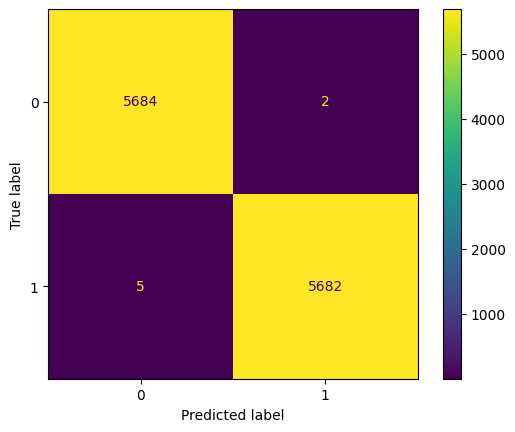

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ensemble, X_test, Y_test)